В качестве датасета для визуализации корреляций возьмём новые данные о параметрах фигур девушек месяца журнала «Плейбой».
Прочитаем датасет и приступим к изучению способов визуализации.

In [104]:
import pandas as pd
df = pd.read_csv('data/model.csv')
df.head()

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916


Набор данных содержит ~600 записей о девушках и семь признаков:

- BMI — индекс массы тела (ИМТ)
- year — год размещения модели в журнале
- waist — обхват талии модели
- hips — обхват бёдер модели
- height — рост модели
- weight — вес модели
- waist/hip — соотношение обхвата талии и бёдер

                   МАТРИЦА КОРРЕЛЯЦИЙ

В случае большого количества данных в датасете матрица, возвращаемая методом pandas data.corr(), становится нечитаемой.

Задание 6.1

Постройте матрицу корреляций для датасета. В ответ впишите самый высокий коэффициент корреляции. Ответ округлите до сотых.

#0.74

In [105]:
round(df.corr(numeric_only=True), 2)

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.00,0.29,-0.28,0.28,-0.01,0.03,0.46
Waist,0.29,1.00,0.28,0.37,0.45,0.14,0.74
Hips,-0.28,0.28,1.00,0.23,0.54,0.21,-0.42
Height,0.28,0.37,0.23,1.00,0.71,-0.04,0.20
Weight,-0.01,0.45,0.54,0.71,1.00,0.21,0.07
BMI,0.03,0.14,0.21,-0.04,0.21,1.00,-0.01
Waist/Hip,0.46,0.74,-0.42,0.20,0.07,-0.01,1.00


→ Матрица получилась большой и потребовалось достаточно много времени, чтобы проанализировать все коэффициенты в этой матрице. А если признаков будет больше? Найти что-то в ней будет практически невозможно.

Поэтому специалисты по данным отдают предпочтение методам визуализации. Один из таких — тепловая матрица корреляций.

                        ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ

Для построения такой матрицы нам будет необходима знакомая нам из модуля по визуализации библиотека seaborn.

Импортируем библиотеку для дальнейшего использования:

In [106]:
import seaborn as sns

Для построения тепловой матрицы корреляций мы воспользуемся методом *sns.heatmap()* библиотеки *seaborn*. 

Метод принимает на вход двумерный массив данных под аргументом *data*. Это может быть матрица корреляций, полученная методом *df.corr()*, матрица пропущенных значений, полученная методом *df.isnull()*, набор данных и многое другое. 

Передадим в метод *heatmap()* нашу матрицу корреляций *corr()*:

<Axes: >

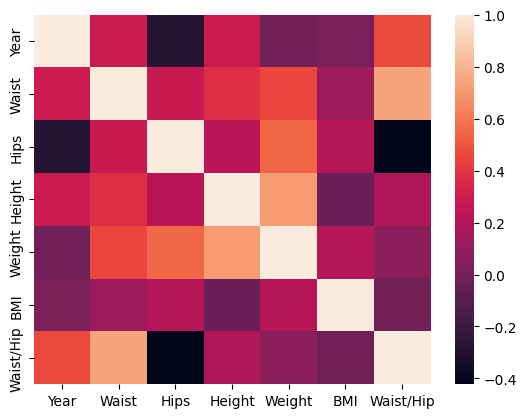

In [107]:
sns.heatmap(df.corr(numeric_only=True))

Чтобы было удобнее её интерпретировать, передадим параметр *annot = True*, чтобы отобразить коэффициент корреляции на пересечении признаков.

<Axes: >

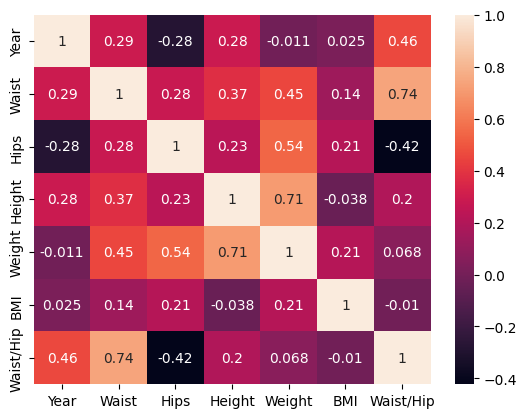

In [108]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

На горизонтальной и вертикальной осях располагаются названия признаков нашего датасета. По главной диагонали — единицы. Матрица симметрична. Справа от матрицы располагается тепловая шкала коэффициентов корреляции: от минимума -0.42 (это корреляция между признаками waist/hip + hips) и максимума по шкале — 1. 

Такую тепловую матрицу очень удобно интерпретировать: в тёплых светлых оттенках отражена положительная корреляция между признаками, в тёмных холодных — отрицательная корреляция. Например, самая большая отрицательная взаимосвязь составляет -0.42, а самая большая положительная — 0.74.
_________________________
С помощью такой матрицы очень удобно оценивать мультиколлинеарность в данных, делать выводы о связях между признаками.
________________
*Например, в нашем наборе данных мультиколлинеарность практически отсутствует, так как из материала прошлого модуля мы знаем, что она возникает из-за признаков с сильной и очень сильной корреляцией. По шкале корреляций это от 0.7 и выше; у нас есть такие признаки с корреляцией выше 0.7 (например: waist/hip + waist). Коэффициент корреляции лишь немного выше, поэтому такой признак, скорее всего, не будет удалён из набора данных.*

О критериях выбора признаков мы поговорим в следующих модулях разведывательного анализа данных.

Также у метода *heatmap* имеется много аргументов, которые позволяют настроить цветовую гамму графика, управлять его элементами и отображением. Подробнее об этом вы прочтёте здесь: [Seaborn Heatmaps: 13 способов настроить визуализацию матрицы корреляции](https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii).

                                SCATTERPLOT

Иногда нам необходимо рассмотреть связь между признаками как распределение. Матрица корреляции может показать нам только силу связи и её направление (плюс/минус). Чтобы рассмотреть распределение и характер связи, существует *точечная диаграмма рассеивания*.
________________________
Точечная диаграмма рассеивания — это такая диаграмма, в которой каждое значение, которое принимает признак в датасете, отражено точкой.
________________

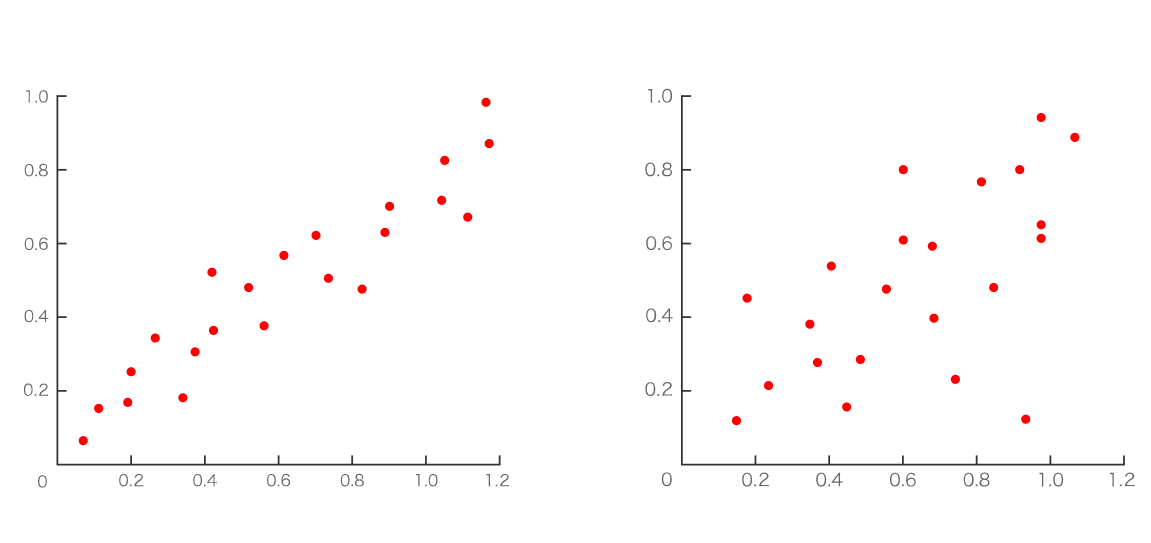

*Пример точечных диаграмм рассеивания. Источник datavizcatalogue.com*

Подобная диаграмма помогает установить характер и силу связи признаков. Присвоив каждой оси переменную, мы можем определить наличие связи между переменными. Сила связи (коэффициент корреляции) зависит от того, насколько плотно расположены точки на диаграмме. Например, на рисунке слева точки расположены более плотно, чем справа. Это означает большую силу связи.

 Давайте построим такой график на примере нашего датасета и рассмотрим его детально.

Для построения точечной диаграммы рассеивания мы воспользуемся знакомой нам библиотекой seaborn, которой мы пользовались при построении тепловой матрицы корреляции.

Метод, который мы будем использовать, — *sns.scatterplot()*. Он отражает связь между переменными, где есть аргументы метода x, y, и признаки, которые мы хотим исследовать.

Возьмём для примера две пары признаков:

- по оси x="Waist/Hip" — соотношение обхвата талии/бедер, по оси y="Waist" — обхват талии;
- по оси x="Weight" — вес модели, а по оси y="Year" — год размещения модели в журнале.

Построим для них точечную диаграмму:

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

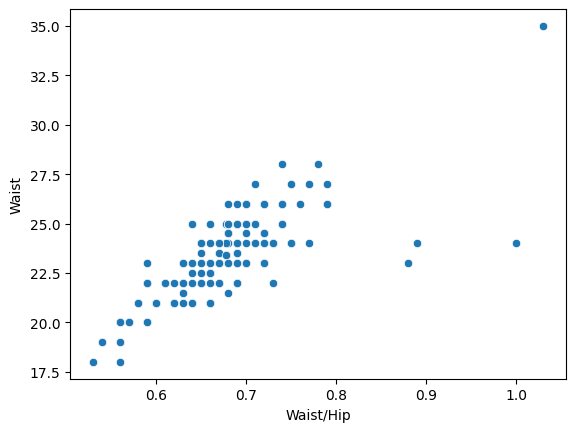

In [109]:
sns.scatterplot(data=df, x="Waist/Hip", y="Waist")

Результатом выполнения функции будет график:

где по оси x располагается признак Waist/Hip, а по оси y — признак Waist.

Построим диаграмму для следующей пары признаков и сравним их.

<Axes: xlabel='Weight', ylabel='Year'>

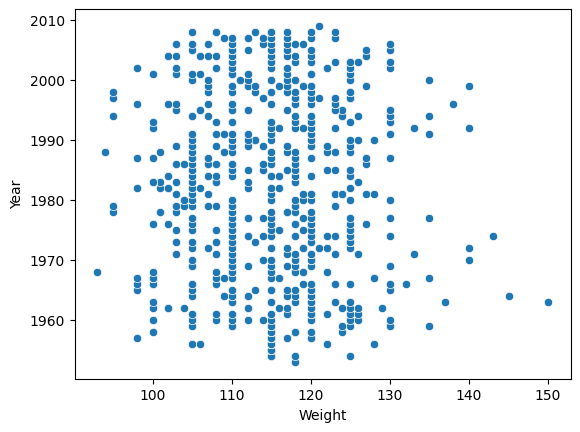

In [110]:
sns.scatterplot(data=df, x="Weight", y="Year")

Сравнив эти два графика, мы можем сказать, что в первой паре признаков связь видна более отчётливо, точки больше прижаты друг к другу и выстроены визуально в линию. Эта линия похожа на рассматриваемую нами в прошлом юните линейную связь. Во второй паре признаков они распределены по всему пространству — трудно выявить основную массу признаков, связь кажется очень слабой.

И если мы вернёмся к тепловой матрице корреляций, то увидим, что в первом случае корреляция составила 0.74, а во втором -0.011 — очень слабая связь. Получается, что при помощи графиков мы можем оценить коэффициент корреляции на глаз. 

Умение интерпретировать графики очень важно для дата-сайентиста и сокращает время работы над разведывательным анализом данных. Опытным специалистам по данным требуется несколько секунд, чтобы определить характер связи: линейная/нелинейная, прямая/обратная, — а также силу связи, или коэффициент корреляции. 

Чтобы делать это так же быстро, необходимо помнить несколько правил. Давайте повторим их и закрепим эти знания визуализацией. 

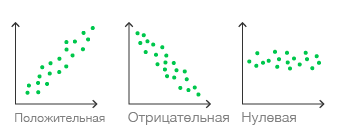

- При положительной корреляции увеличение одного признака приводит к увеличению другого. И наоборот.
- При отрицательной связи увеличение одного из признаков приводит к уменьшению другого и наоборот.
- При нулевой корреляции признаки распределяются независимо друг от друга, что видно на рисунке.

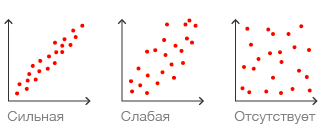

 *Типы связей на графиках рассеивания. Источник datavizcatalogue.com*

При сильной связи точки на графике расположены близко друг к другу. Чем связь слабее, тем дальше находятся точки друг от друга. На графике изображена сильная связь с коэффициентом корреляции ~0.95, слабая с коэффициентом корреляции ~0.5 и нулевая корреляция.
________________
**Диаграмма рассеивания в данных** — удобный инструмент анализа, но, к сожалению, только для пары признаков. 

**Тепловая матрица корреляций** удобна для анализа всего датасета, но показывает только силу и направления корреляции (плюс/минус), а информации о распределении признаков мы не получаем. 
______________________
Существует ли что-то, что объединяет лучшее из этих подходов? Да!

Это график попарных отношений в библиотеке seaborn.

                        ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT

Давайте построим график [PairPlot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) для нашего набора данных:

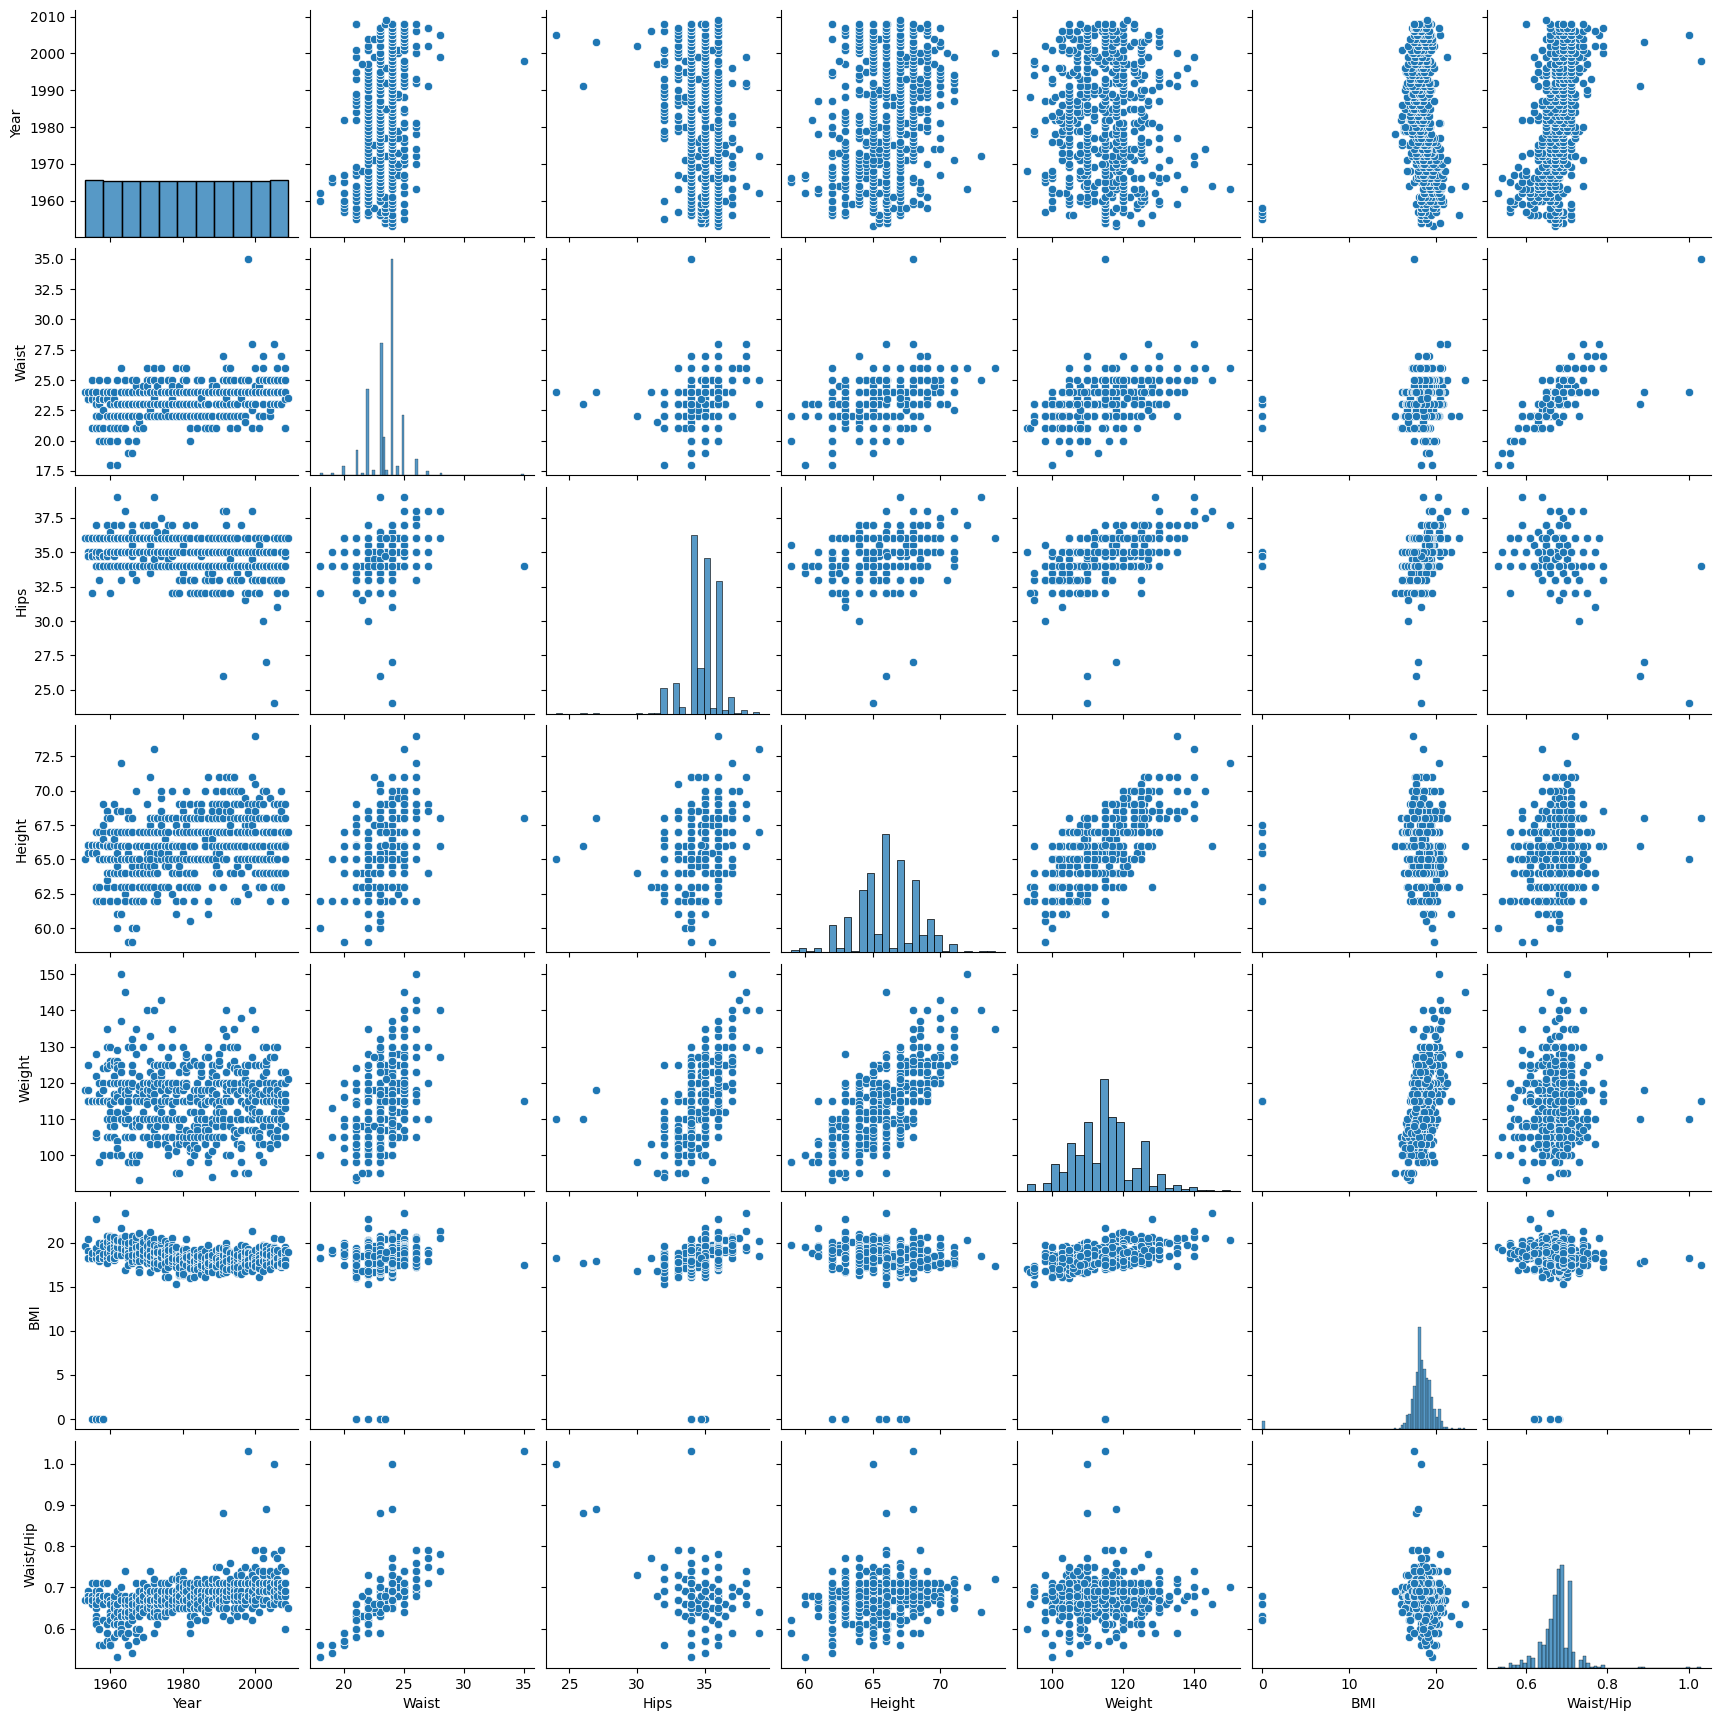

In [111]:
sns.pairplot(df)

Структура похожа на изученную нами тепловую матрицу корреляций. На осях х и у расположились признаки из набора данных. На главной диагонали вместо единиц представлены графики-распределения конкретной величины. В остальных ячейках мы можем увидеть точечный график связей признаков между собой — это scatterplot, который мы строили для пары признаков. Здесь это пара признаков, которые пересекаются между собой.

?Что мы можем увидеть в таком графике? *Признаки weight (вес модели) и height (рост модели) распределены почти нормально, они выделены на рисунке ниже красным кругом. Это видно на графике распределения.*

Из прошлых юнитов мы знаем, что распределение роста и веса заранее будет ожидаемо нормальным. 

Также интересна связь на пересечении двух признаков. Диаграмма рассеяния линейна, вытянута вдоль прямой. Она положительна — с увеличением одной переменной растёт значение другой. Она ближе к сильной связи — точки расположены близко друг к другу. Можно сделать предположение о коэффициенте корреляции примерно ~0,7.

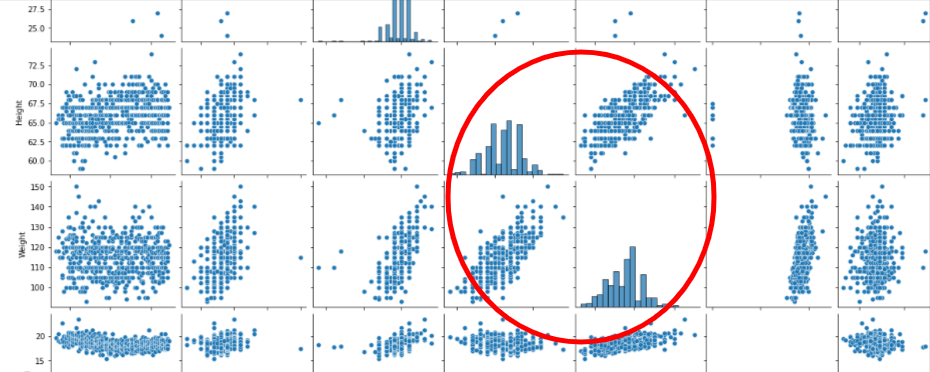

Задание 6.2

Определите, какой тип корреляции подходит для расчёта коэффициента корреляции между признаками weight (вес модели) и height (рост модели)?

Пирсона

*Пояснение: Как мы выяснили ранее, данные имеют близкое к нормальному распределение и линейную связь, поэтому используем корреляцию Пирсона.*

Задание 6.3

Посчитайте коэффициент корреляции между признаками Weight (вес модели) и Height (рост модели). Ответ округлите до сотых.

Пояснение

Считаем корреляцию Пирсона data.corr(). Действительно, наше предположение оказалось верным, и корреляция между признаками Weight (вес модели) и Height (рост модели) составила около 0.71

In [112]:
round(df.corr(numeric_only=True), 2)
#0.71

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.00,0.29,-0.28,0.28,-0.01,0.03,0.46
Waist,0.29,1.00,0.28,0.37,0.45,0.14,0.74
Hips,-0.28,0.28,1.00,0.23,0.54,0.21,-0.42
Height,0.28,0.37,0.23,1.00,0.71,-0.04,0.20
Weight,-0.01,0.45,0.54,0.71,1.00,0.21,0.07
BMI,0.03,0.14,0.21,-0.04,0.21,1.00,-0.01
Waist/Hip,0.46,0.74,-0.42,0.20,0.07,-0.01,1.00


Задание 6.4

Какие из перечисленных ниже методов визуализации отображают точечную диаграмму связей признаков?


- sns.pairplot()
- sns.scatterplot()
 _____________
Пояснение *sns.pairplot() отражает точечные диаграммы связей для всех пар признаков, а sns.scatterplot() — для выбранной. df.corr(), как и sns.heatmap(), возвращает только силу связи между признаками, выраженную в числах.*
___________

Задание 6.5

Какой из методов визуализации отображает распределение признака?


sns.pairplot()
___________
Пояснение *sns.pairplot() отражает по главной диагонали распределение признака. sns.scatterplot() отображает только точечную диаграмму связей для выбранной. df.corr(), как и sns.heatmap(), не отображает распределение.*
________________

Задание 6.6

Выберите, на каких графиках можно увидеть направление связи — например, что связь положительная (при увеличении значений признака следует увеличение значений другого признака и наоборот).


sns.pairplot()
sns.scatterplot()
sns.heatmap()
_________________
Пояснение *sns.scatterplot(), как и sns.pairplot(), отображает точечную диаграмму связей, на которой можно увидеть направление связи. sns.heatmap() отображает направления связи при помощи знака коэффициента корреляции (плюс — положительная связь, минус — отрицательная связь)*
___________________

                                 ПРОВЕРКА

✍️ А теперь настало время применить знания на практике! В следующих практических заданиях мы продолжим работать с датасетом моделей журнала «Плейбой», с которым познакомились в прошлом юните.

#### Задание 7.1

Определите, к какому типу относятся признаки weight и height?

weight - числовой

height - числовой
______
Пояснение *Бинарные и ранговые относятся к категориальным признакам; оба признака распределяются нормально и относятся к числовому типу.*
________
#### Задание 7.2

Рассчитайте среднее значение признаков при помощи библиотеки statistics для признаков weight и height. Ответ округлите до сотых.
________
Так как признаки распределены нормально и нет выбросов, воспользуемся расчётом среднего арифметического.

- statistics.mean(data['Weight'])
- statistics.mean(data['Height'])
_________

In [120]:
import statistics
b = statistics.mean(df['Weight'])
print(f'среднее значение признакa "Weight" {round(b, 2)}')

среднее значение признакa "Weight" 114.94


In [118]:
a= round(df['Height'].mean(), 2)
print(f'среднее значение признакa "Height" {a}')

среднее значение признакa "Height" 66.06


#### Задание 7.3

Постройте матрицы визуализации корреляций, диаграммы рассеивания, проанализируйте и выполните задание.

Заполните пропуски.

- С увеличением обхвата бедер модели ИМТ незначительно *увеличивается*.
- Обхват бёдер имеет *положительную* связь с весом модели.
- С увеличением обхвата бёдер *увеличивается* вес модели.
- Год выпуска журнала и вес модели имеют*нулевую* связь.

 построим ТЕПЛОВУЮ МАТРИЦУ КОРРЕЛЯЦИЙ

<Axes: >

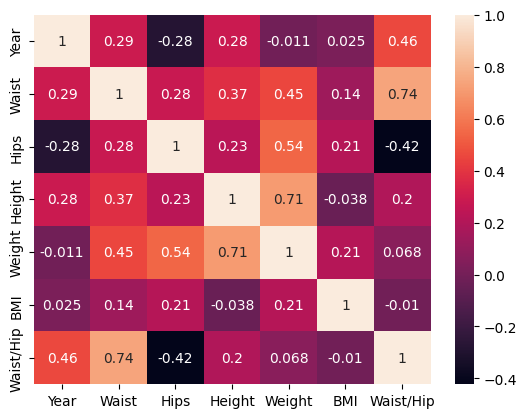

In [121]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

Задание 7.4

Проанализируйте график и определите величину коэффициента корреляции между признаками на оси  и признаком на оси  на данном графике.

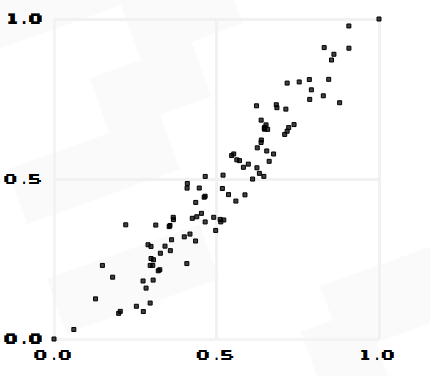

0.95 

Пояснение *Чем плотнее точки, тем больше коэффициент корреляции. Здесь точки расположены очень близко друг к другу, коэффициент корреляции составляет 0.95.*

Задание 7.5

Проанализируйте график и определите тип связи между признаком на оси  и признаком на оси .

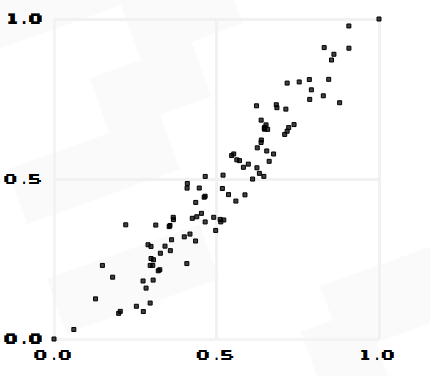

положительная

Пояснение *В точке 0 по оси  . В точке 0.5 по оси   и так далее. Когда при увеличении признака другой закономерно увеличивается, это свидетельствует о положительной связи между признаками.*

Задание 7.6

Проанализируйте графики и выберите график с наибольшим коэффициентом корреляции.

1 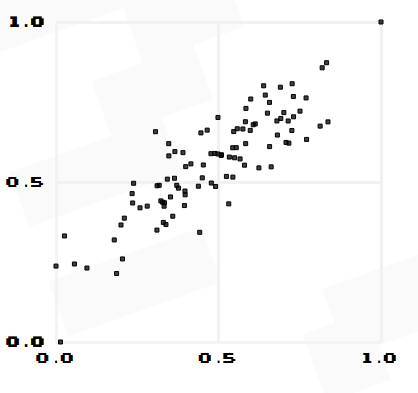 2 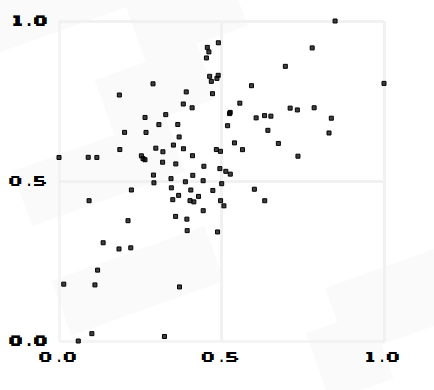

3 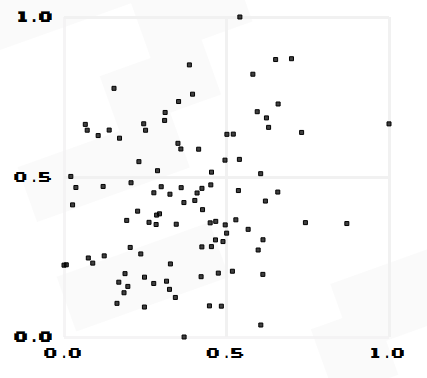 4 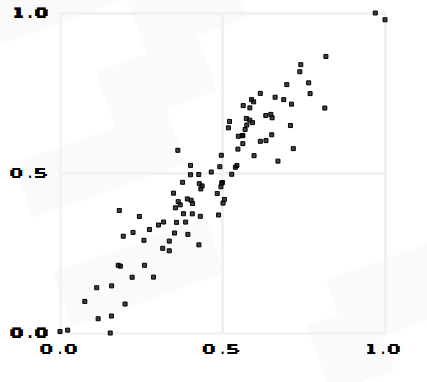

ответ 4

Пояснение

Чем плотнее точки, тем больше коэффициент корреляции. В последнем примере точки расположены очень близко друг к другу, коэффициент корреляции составляет 0.95. В первом примере — ~0.8, во втором — ~0.5, в третьем — ~0.2.


0. Повторение — мать учения EDA-3. Проектирование признаков

#### Задание 0.1

Какие типы корреляций существуют? Выберите все верные варианты.

Существуют корреляции Пирсона, Спирмена, Кендалла. Остальные вымышлены.

#### Задание 0.2
 
Какая мера центральной тенденции подойдёт для определения самой популярной породы собак?

мода

*Чаще всего мода используется в нечисловых рядах. Например, самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.*
#### Задание 0.3

Какой коэффициент корреляции говорит о сильной связи между признаками?

+/- 0.7…+/- 0.9

Приняты следующие градации. 
- Отсутствие связи или очень слабая связь — 0…+/- 0.3. 
- Слабая связь — +/- 0.3…+/- 0.5. 
- Средняя связь — +/- 0.5…+/- 0.7. 
- Сильная связь — +/- 0.7…+/- 0.9. 
- Очень сильная или абсолютная связь — +/- 0.7…+/-1.
